In [79]:
import pandas as pd

In [100]:
pd.set_option('max.columns', 100)

In [102]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [140]:
import networkx as nx

## Play with `osmnx`

In [2]:
import osmnx as ox

details on cycle lanes here: https://wiki.openstreetmap.org/wiki/Key:cycleway

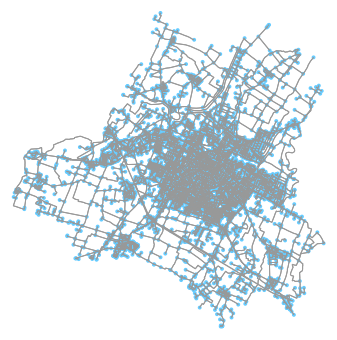

(<Figure size 602.109x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2675ceb8>)

In [3]:
ox.plot_graph(ox.graph_from_place('Modena, Italy'))

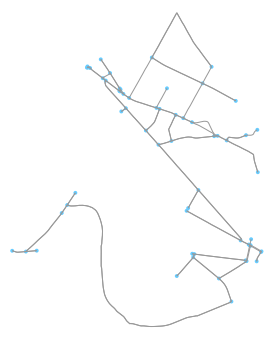

(<Figure size 334.577x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2d994c18>)

In [13]:
G = ox.graph_from_point((42.3722307,-71.1088843), distance=2000, 
                        infrastructure = 'way["cycleway"]')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [15]:
G = ox.graph_from_point((42.3722307,-71.1088843), distance=2000, 
                        infrastructure = 'way["cycleway= lane"]')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

EmptyOverpassResponse: There are no data elements in the response JSON objects

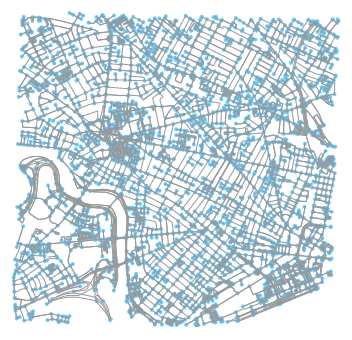

(<Figure size 436.002x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a26604f98>)

In [14]:
G = ox.graph_from_point((42.3722307,-71.1088843), distance=2000)
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

## OSM query language

* [Homepage of the Overpass API](https://wiki.openstreetmap.org/wiki/Overpass_API)
* [Documentation of the Overpass query language](https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL)
* [Overpass Turbo](https://overpass-turbo.eu/), a web tool for creating queries

## Try ds421's filter for bicycle ways

Code adapted from [this line and the next several lines](https://github.com/ds421/chester-final-project/blob/master/compare_bikeways.py#L237)

In [34]:
tag_filter = (
    '["area"!~"yes"]'
    '["highway"!~"service|footway|motor|proposed|construction|abandoned|platform|raceway"]'
    '["bicycle"!~"no"]'
    '["access"!~"private"]'
)

In [22]:
cambridge_shape = ox.gdf_from_place('Cambridge, Massachusetts')

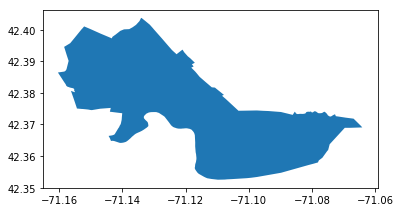

In [38]:
cambridge_shape.plot()

Download the OSM data ([source](https://github.com/ds421/chester-final-project/blob/master/compare_bikeways.py#L241)):

In [26]:
cambridge_shape

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-71.064047,42.40376,42.352522,-71.1604,"POLYGON ((-71.1604001 42.3864602, -71.15840420...","Cambridge, Middlesex County, Massachusetts, USA"


In [28]:
overpass_jsons = ox.osm_net_download(cambridge_shape.geometry.iloc[0], custom_filter=tag_filter)

In [43]:
type(overpass_jsons)

list

In [44]:
len(overpass_jsons)

1

In [49]:
overpass_jsons[0].keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [50]:
overpass_jsons[0]['version']

0.6

In [51]:
overpass_jsons[0]['generator']

'Overpass API 0.7.55.5 2ca3f387'

In [52]:
overpass_jsons[0]['osm3s']

{'timestamp_osm_base': '2019-01-22T02:16:03Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [54]:
len(overpass_jsons[0]['elements'])

11886

In [56]:
overpass_jsons[0].keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [64]:
overpass_jsons[0]['elements'][0]

{'type': 'node',
 'id': 61170342,
 'lat': 42.3872153,
 'lon': -71.116705,
 'tags': {'highway': 'traffic_signals'}}

Get a list of all tags among the elements:

In [65]:
elements = overpass_jsons[0]['elements']

In [78]:
cycleway_types = [e['tags']['cycleway'] for e in elements if 'tags' in e and 'cycleway' in e['tags']]

In [81]:
pd.Series(cycleway_types).value_counts()

lane             227
track             39
shared_lane       12
shared             8
no                 7
opposite_lane      3
crossing           1
dtype: int64

In [93]:
pd.DataFrame([
    e['tags']
    for e in elements
    if 'tags' in e and 'cycleway' in e['tags'] and 'Cambridge Street' in e['tags'].get('name', '')])

,attribution,condition,cycleway,highway,lanes,lanes:backward,lanes:forward,massgis:way_id,name,oneway,source,surface,turn:lanes:backward,turn:lanes:forward,width
0,Office of Geographic and Environmental Informa...,fair,lane,tertiary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
1,Office of Geographic and Environmental Informa...,fair,track,tertiary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
2,Office of Geographic and Environmental Informa...,fair,lane,secondary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
3,Office of Geographic and Environmental Informa...,fair,lane,secondary,2,NaN,NaN,179248,Cambridge Street,yes,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
4,Office of Geographic and Environmental Informa...,fair,lane,tertiary,3,2,1,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,through|through;right,NaN,21.3
5,Office of Geographic and Environmental Informa...,fair,lane,secondary,4,2,2,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,through|left,left|,21.3
6,Office of Geographic and Environmental Informa...,fair,lane,secondary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
7,Office of Geographic and Environmental Informa...,fair,lane,secondary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
8,Office of Geographic and Environmental Informa...,fair,lane,secondary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3
9,Office of Geographic and Environmental Informa...,fair,track,tertiary,2,NaN,NaN,179248,Cambridge Street,NaN,massgis_import_v0.1_20071008165629,asphalt,NaN,NaN,21.3


Bikeway types:

In [57]:
bikeway_types = [
    'off_street_path',
    'bike_blvd',
    'separated_bike_lane',
    'bike_lane',
    'shoulder',
    'sharrow',
    'bike_route']

Convert Cambridge's elements' attributes to a DataFrame:

In [97]:
cambridge_cycleways = pd.DataFrame([
    e['tags']
    for e in elements
    if 'tags' in e and 'cycleway' in e['tags']
])

In [98]:
len(cambridge_cycleways)

297

In [105]:
sorted(cambridge_cycleways.columns)

['access',
 'alt_name',
 'attribution',
 'bicycle',
 'bridge',
 'condition',
 'construction',
 'cycleway',
 'foot',
 'footway',
 'hazmat',
 'highway',
 'horse',
 'lanes',
 'lanes:backward',
 'lanes:forward',
 'layer',
 'lit',
 'massgis:ref',
 'massgis:way_id',
 'maxspeed',
 'maxspeed:type',
 'motor_vehicle',
 'name',
 'note',
 'note:lanes',
 'old_ref',
 'oneway',
 'parking:condition:right',
 'parking:lane:right',
 'ref',
 'segregated',
 'sidewalk',
 'source',
 'source:maxspeed',
 'start_date',
 'surface',
 'turn:lanes',
 'turn:lanes:backward',
 'turn:lanes:forward',
 'width']

In [101]:
cambridge_cycleways.head()

,access,alt_name,attribution,bicycle,bridge,condition,construction,cycleway,foot,footway,hazmat,highway,horse,lanes,lanes:backward,lanes:forward,layer,lit,massgis:ref,massgis:way_id,maxspeed,maxspeed:type,motor_vehicle,name,note,note:lanes,old_ref,oneway,parking:condition:right,parking:lane:right,ref,segregated,sidewalk,source,source:maxspeed,start_date,surface,turn:lanes,turn:lanes:backward,turn:lanes:forward,width
0,NaN,NaN,Office of Geographic and Environmental Informa...,designated,NaN,good,NaN,shared_lane,NaN,NaN,NaN,secondary,NaN,2,NaN,NaN,NaN,NaN,0 N325,177682,30 mph,NaN,NaN,Prospect Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,massgis_import_v0.1_20071008141127,massgis,NaN,asphalt,NaN,NaN,NaN,15.2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lane,NaN,NaN,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25 mph,NaN,NaN,Chauncy Street,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asphalt,NaN,NaN,NaN,NaN
2,NaN,NaN,Office of Geographic and Environmental Informa...,NaN,NaN,deficient,NaN,shared_lane,NaN,NaN,NaN,residential,NaN,2,NaN,NaN,NaN,NaN,NaN,108340,25 mph,NaN,NaN,Lakeview Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,massgis_import_v0.1_20071008165629,NaN,NaN,asphalt,NaN,NaN,NaN,14.0
3,NaN,NaN,Office of Geographic and Environmental Informa...,yes,NaN,fair,NaN,no,NaN,NaN,NaN,residential,NaN,2,NaN,NaN,NaN,NaN,NaN,162693,25 mph,NaN,NaN,Davenport Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,massgis_import_v0.1_20071008165629,NaN,NaN,asphalt,NaN,NaN,NaN,11.6
4,NaN,NaN,Office of Geographic and Environmental Informa...,NaN,NaN,fair,NaN,lane,NaN,NaN,NaN,residential,NaN,2,NaN,NaN,NaN,NaN,NaN,138841,NaN,NaN,NaN,Holworthy Street,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,massgis_import_v0.1_20071008165629,NaN,NaN,asphalt,NaN,NaN,NaN,12.2


In [103]:
[
    e
    for e in elements
    if 'tags' in e and 'cycleway' in e['tags']
]

[{'type': 'way',
  'id': 8605216,
  'nodes': [61173523, 61173516, 61173519, 61173829, 61171139],
  'tags': {'attribution': 'Office of Geographic and Environmental Information (MassGIS)',
   'bicycle': 'designated',
   'condition': 'good',
   'cycleway': 'shared_lane',
   'highway': 'secondary',
   'lanes': '2',
   'massgis:ref': '0 N325',
   'massgis:way_id': '177682',
   'maxspeed': '30 mph',
   'name': 'Prospect Street',
   'source': 'massgis_import_v0.1_20071008141127',
   'source:maxspeed': 'massgis',
   'surface': 'asphalt',
   'width': '15.2'}},
 {'type': 'way',
  'id': 8614586,
  'nodes': [61324107,
   2562519333,
   2562519335,
   2562504735,
   2562519337,
   2559968299],
  'tags': {'cycleway': 'lane',
   'highway': 'residential',
   'maxspeed': '25 mph',
   'name': 'Chauncy Street',
   'oneway': 'yes',
   'surface': 'asphalt'}},
 {'type': 'way',
  'id': 8614598,
  'nodes': [61329035, 61330278],
  'tags': {'attribution': 'Office of Geographic and Environmental Information (Mas

### tracks only

In [106]:
track_cycleways = ox.osm_net_download(cambridge_shape.geometry.iloc[0], custom_filter=(
    '["area"!~"yes"]'
    '["highway"!~"service|footway|motor|proposed|construction|abandoned|platform|raceway"]'
    '["bicycle"!~"no"]'
    '["access"!~"private"]'
    '["cycleway"~"track"]'
))

In [190]:
i_would_bike_this = (
    '["cycleway"~"track|opposite_track|shared_lane|share_busway|shared|lane|opposite_lane|opposite|separate"]'
)

In [191]:
every_road = (
    '["area"!~"yes"]'
    '["access"!~"private"]'
)

In [192]:
davis_graph = ox.graph_from_place(
    query='Davis, California',
    custom_filter=i_would_bike_this)

In [193]:
davis_everything = ox.graph_from_place(
    query='Davis, California',
    custom_filter=every_road)

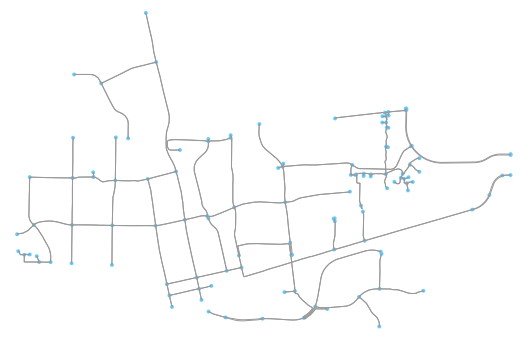

(<Figure size 869.416x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c47b3c8>)

In [194]:
ox.plot_graph(davis_graph)

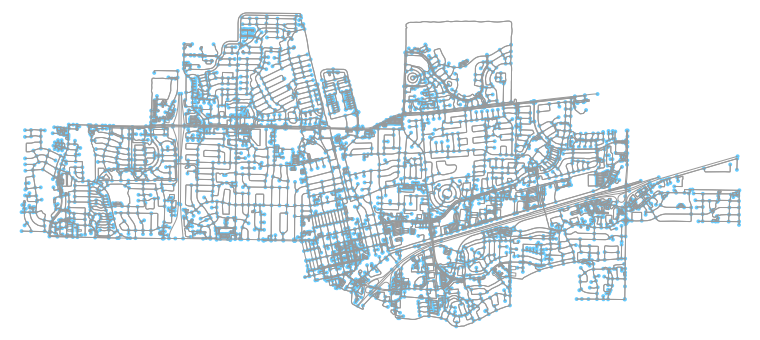

(<Figure size 1264.45x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2590c6a0>)

In [195]:
ox.plot_graph(davis_everything)

In [196]:
len(davis_graph.nodes), len(davis_everything.nodes), len(davis_graph.nodes) / len(davis_everything.nodes)

(121, 5424, 0.022308259587020648)

In [197]:
cambridge_graph = ox.graph_from_place(
    query='Cambridge, Massachusetts',
    custom_filter=i_would_bike_this)

In [198]:
cambridge_everything = ox.graph_from_place(
    query='Cambridge, Massachusetts',
    custom_filter=every_road)

In [199]:
len(cambridge_graph.nodes), len(cambridge_everything.nodes), len(cambridge_graph.nodes) / len(cambridge_everything.nodes)

(55, 5074, 0.01083957430035475)

In [200]:
boston_graph = ox.graph_from_place(
    query='Boston, Massachusetts',
    custom_filter=i_would_bike_this)

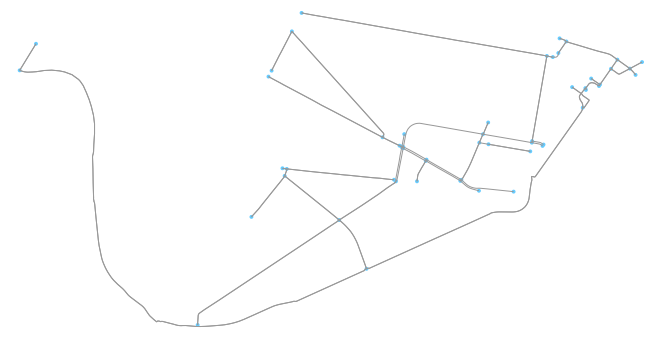

(<Figure size 1160.33x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a286db198>)

In [201]:
ox.plot_graph(cambridge_graph)

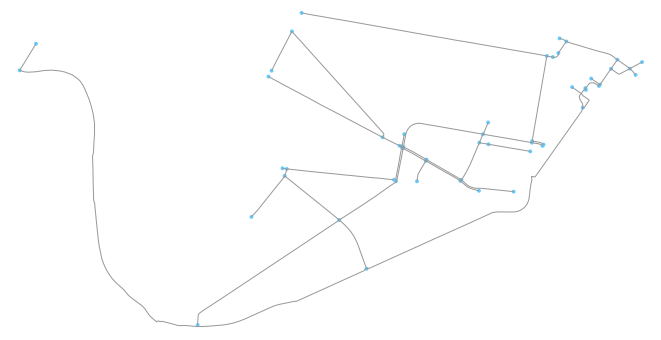

(<Figure size 1160.33x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a300e4cf8>)

In [202]:
ox.plot_graph(nx.to_undirected(cambridge_graph))

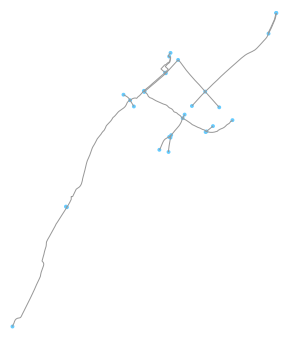

(<Figure size 491.713x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a275486a0>)

In [203]:
ox.plot_graph(nx.to_undirected(boston_graph))

In [204]:
list(len(component) for component in nx.connected_components(nx.to_undirected(davis_graph)))

[121]

In [205]:
list(len(component) for component in nx.connected_components(nx.to_undirected(cambridge_graph)))

[55]

#### amsterdammmn you have good infrastructure

In [206]:
am_graph = ox.graph_from_place(
    query='Amsterdam, Netherlands',
    custom_filter=i_would_bike_this)

In [207]:
am_graph.nodes

NodeView((5805453834, 46293003, 5805453835, 5805453836, 46318091, 46318613, 3294630430, 46298145, 46288424, 46296111, 46286385, 46293554, 46315577, 46295102, 46297663, 46306367, 46301250, 46323267, 46298181, 46293071, 46291028, 46318165, 46317142, 46302808, 46311513, 3295383132, 3295383136, 46291553, 46295651, 46304868, 46296689, 46295155, 46292084, 46321276, 4759257229, 46307982, 284742286, 5629182107, 46302368, 2021904549, 46320806, 46320807, 46289066, 46289580, 46304951, 46302397, 46283969, 46283970, 46304452, 46299846, 3627356879, 46323920, 46308060, 46316769, 46305510, 46296815, 46309621, 46287095, 46300411, 46288638, 46297343, 46298882, 46313235, 46293269, 46299414, 2673087256, 46312728, 46299428, 46302502, 2673087273, 46299442, 46311730, 46293812, 46307639, 46309175, 46289728, 46298944, 46324554, 46295371, 46305102, 46290259, 46301016, 46290803, 46306163, 46293876, 46308734, 343584641, 46324098, 46287749, 46315406, 46302613, 46332313, 863195548, 46309789, 1977796511, 46300576, 4

In [ ]:
am_everything = ox.graph_from_place(
    query='Amsterdam, The Netherlands',
    custom_filter=every_road)

In [ ]:
ox.plot_graph(am_graph)

In [ ]:
ox.plot_graph(am_everything)

In [ ]:
list(map(len, nx.connected_components(nx.to_undirected(am_graph))))

In [ ]:
list(map(len, nx.connected_components(nx.to_undirected(am_everything))))

In [ ]:
len(am_graph.nodes), len(am_everything.nodes), len(am_graph.nodes) / len(am_everything.nodes)

## TODO

* figure out how to specify advisory lanes and exclusive lanes; see [wiki](https://wiki.openstreetmap.org/wiki/Key:cycleway#Dedicated_cycle_lanes).
* figure out what the nodes are and what nodes are approproate
* why is Amsterdam's giant component only 0.3%?